In [1]:
# description       : Predict Tweet classification (Text based)
# ML Models used    : Naive bayes, Support Vector Machine
# author            : raulsainz
# email             : 
# date              : 20210327
# version           : 0.1
#==============================================================================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from myFuntcions.basic import *
%load_ext autoreload
%autoreload 2

* *Bernoulli Naive Bayes* : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

* *Multinomial Naive Bayes* : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

* *Gaussian Naive Bayes* : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

In [4]:
#Setup pandas display parameters
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
pd.options.display.max_colwidth= 100
pd.options.display.precision = 3

In [5]:
#Set Seaborn Plot enviroment
sns.set()
sns.set_context('notebook',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
bin_colors = ["#264653","#2A9D8F","#ee8959","#e97c61"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

In [6]:
#read CSV Data set
#df01 = loadDataSet('Tweets.csv',sample_size=0.3)
df_csv = pd.read_csv('datasets/Tweets.csv')


In [7]:
df_csv.shape

(14640, 15)

In [8]:
#Check for null values on all columns
pd.DataFrame({
                'unicos':df_csv.nunique(),
                'missing total': df_csv.isna().sum(),
                'missing %': df_csv.isna().sum()/df_csv.count(),
                'tipo':df_csv.dtypes})

,unicos,missing total,missing %,tipo
tweet_id,14485,0,0.000,int64
airline_sentiment,3,0,0.000,object
airline_sentiment_confidence,1023,0,0.000,float64
negativereason,10,5462,0.595,object
negativereason_confidence,1410,4118,0.391,float64
airline,6,0,0.000,object
airline_sentiment_gold,3,14600,365.000,object
name,7701,0,0.000,object
negativereason_gold,13,14608,456.500,object
retweet_count,18,0,0.000,int64


In [9]:
df_csv.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
df_csv['airline_sentiment'].value_counts(normalize=True)

negative    0.627
neutral     0.212
positive    0.161
Name: airline_sentiment, dtype: float64

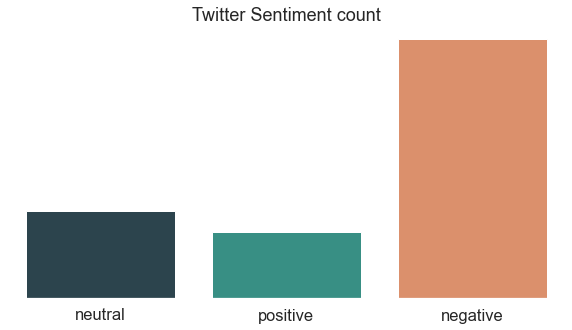

In [11]:
#df01['airline_sentiment'].value_counts().plot(kind='bar',palette = bin_palette)
ax = sns.countplot(x = 'airline_sentiment', data = df_csv ,palette = bin_palette)
ax.set(xlabel = "",title = 'Twitter Sentiment count')
#set legends friendly name
#ax.set_xticklabels(['Disloyal','Loyal'])
#Hide Y labels
ax.axes.yaxis.set_visible(False)

In [12]:
df_csv.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.349,NaN,0.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.684,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.000,Bad Flight,0.703,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.000,Can't Tell,1.000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
df_csv["sentiment_positive"] = np.where(df_csv["airline_sentiment"] != 'negative' , 1, 0)

In [14]:
df_csv['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
6         3
7         3
22        2
9         1
18        1
32        1
11        1
8         1
28        1
44        1
15        1
31        1
Name: retweet_count, dtype: int64

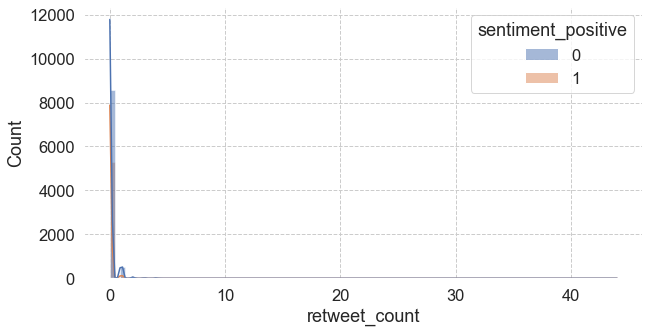

In [15]:
ax = sns.histplot(data = df_csv , x ='retweet_count', hue = 'sentiment_positive', kde = True, bins = 100)

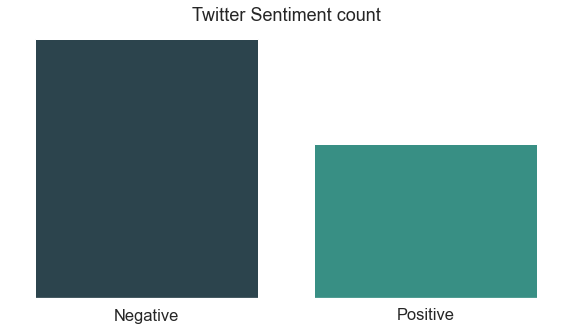

In [16]:
#df01['airline_sentiment'].value_counts().plot(kind='bar',palette = bin_palette)
ax = sns.countplot(x = 'sentiment_positive', data = df_csv ,palette = bin_palette)
ax.set(xlabel = "",title = 'Twitter Sentiment count')
#set legends friendly name
ax.set_xticklabels(['Negative','Positive'])
#Hide Y labels
ax.axes.yaxis.set_visible(False)

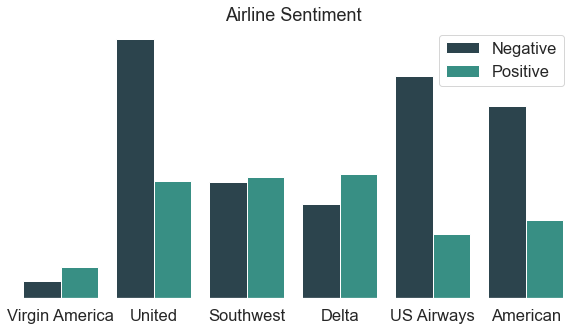

In [17]:
#create plot
ax = sns.countplot(x = 'airline' ,hue='sentiment_positive', data = df_csv ,palette = bin_palette)

ax.set(xlabel = "",title = 'Airline Sentiment')
#set legends friendly name
ax.legend(['Negative', 'Positive'])
#ax.set_xticklabels(['Disloyal','Loyal'])
#Hide Y labels
ax.axes.yaxis.set_visible(False)


In [18]:
airline_dummy = pd.get_dummies(df_csv['airline'])
airline_dummy 
df_csv = df_csv.merge(airline_dummy,left_index=True,right_index=True)

In [19]:
df_csv.drop(['tweet_id','retweet_count','airline_sentiment','airline','airline_sentiment_gold','negativereason_gold','negativereason_confidence','tweet_coord','tweet_created','tweet_location','name','airline_sentiment_confidence','user_timezone','negativereason'], axis='columns', inplace=True)
df_csv.dtypes

text                  object
sentiment_positive     int64
American               uint8
Delta                  uint8
Southwest              uint8
US Airways             uint8
United                 uint8
Virgin America         uint8
dtype: object

In [20]:
df_csv.head()

,text,sentiment_positive,American,Delta,Southwest,US Airways,United,Virgin America
0,@VirginAmerica What @dhepburn said.,1,0,0,0,0,0,1
1,@VirginAmerica plus you've added commercials to the experience... tacky.,1,0,0,0,0,0,1
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,1,0,0,0,0,0,1
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",0,0,0,0,0,0,1
4,@VirginAmerica and it's a really big bad thing about it,0,0,0,0,0,0,1


# Text Processing and Document Matrix

In [21]:
#libraries for text analysis and extraction
import string
import re
import demoji                                                   #find or remove emojis from a blob of text.
from sklearn.feature_extraction.text import CountVectorizer
#import nltk #provides a set of diverse natural languages algorithms, used for tokenizing
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from yellowbrick.text import FreqDistVisualizer

In [22]:
# To Lower
df_csv['text'] = df_csv['text'].str.lower()
df_csv.text.head(20)

0                                                                     @virginamerica what @dhepburn said.
1                                @virginamerica plus you've added commercials to the experience... tacky.
2                                 @virginamerica i didn't today... must mean i need to take another trip!
3     @virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                 @virginamerica and it's a really big bad thing about it
5     @virginamerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's r...
6                         @virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)
7     @virginamerica really missed a prime opportunity for men without hats parody, there. https://t.c...
8                                                         @virginamerica well, i didn't…but now i do! :-d
9                        @virginamerica it was

In [23]:
#Find all the hashtags
df_csv['hashtag'] = df_csv['text'].apply(lambda x: re.findall(r'#(\w+)', x))

In [24]:
#Replace emojis with emoji description
df_csv['text'] = df_csv['text'].apply(lambda tweet: demoji.replace_with_desc(tweet, ""))

In [25]:
 # Removes URL's 
df_csv['text'] = df_csv['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [26]:
#Striping punctuation
df_csv['text'] = df_csv['text'].str.replace('[{}]'.format(string.punctuation), '') # Removes punctuation


ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [27]:
df_csv['text'] = df_csv['text'].str.replace('[0-9]'.format(string.punctuation), '') # Removes Numbers

ipykernel_launcher:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [28]:
df_csv.text.head(20)

0                                                                        virginamerica what dhepburn said
1                                      virginamerica plus youve added commercials to the experience tacky
2                                       virginamerica i didnt today must mean i need to take another trip
3     virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp th...
4                                                   virginamerica and its a really big bad thing about it
5     virginamerica seriously would pay  a flight for seats that didnt have this playing\nits really t...
6                             virginamerica yes nearly every time i fly vx this “ear worm” won’t go away 
7                      virginamerica really missed a prime opportunity for men without hats parody there 
8                                                               virginamerica well i didnt…but now i do d
9                             virginamerica it

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['͡°','……','ʖ','-gt'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
#lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop  = lambda word: word not in stop_words
single_char  = lambda word: len(word)>1
steam = lambda word: stemmer.stem(word)
def mytokenizer(sentence):
    tokens = word_tokenize(sentence)
    #print(tokens)
    new = list(filter(stop, tokens))
    new = list(filter(single_char, new))
    new = list(map(steam, new))
    return new

In [31]:
# Full document-term matrix for title
cv = CountVectorizer(tokenizer=mytokenizer,min_df=3)
tweets_dtm = cv.fit_transform(df_csv.text) #Document term matrix 
tweets_words = cv.get_feature_names() # Get feature names
# Create Data Frame with Word Frecuency
df_word_frequency = pd.DataFrame(tweets_dtm.toarray(), columns=tweets_words)

In [32]:

print(df_word_frequency.shape)

(14640, 3321)


In [33]:
#Transform all count values to True | False
df_word_bool = df_word_frequency.apply(lambda x: [True if y >0 else False for y in x])
df_word_bool.head()

,aa,aadvantag,aarp,abandon,abc,abcnetwork,abil,abl,aboard,abq,absolut,absurd,abt,abus,abysm,ac,accept,access,accid,accident,accommod,accomplish,accord,accordingli,account,...,yeah,year,yell,yep,yest,yesterday,yet,yo,york,youd,youll,young,your,yousuck,youth,youv,yr,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(tokenizer=mytokenizer,min_df=3)
trans = tf_idf.fit_transform(df_csv.text)
#create data frame with tf_idf
df_tfidf = pd.DataFrame(trans.toarray(),columns = tf_idf.get_feature_names())
df_tfidf.sum().sort_values(ascending=False)

flight         662.418
unit           637.872
americanair    518.635
usairway       510.025
jetblu         482.538
                ...   
opal             1.008
cellphon         0.939
handfold         0.867
facefac          0.792
facefold         0.684
Length: 3321, dtype: float64

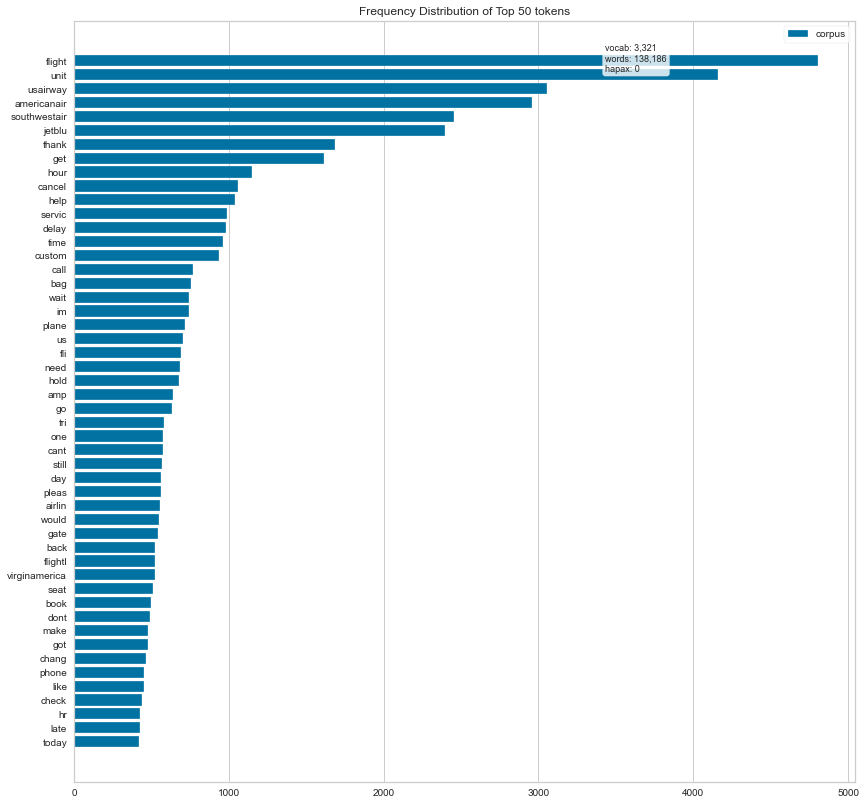

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [35]:
#Create word distribution plot
plt.figure(figsize=(14, 14))
visualizer = FreqDistVisualizer(features=tweets_words, orient='h')
visualizer.fit(tweets_dtm)
visualizer.show()

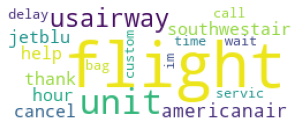

In [37]:
from wordcloud import WordCloud
top_words = list(df_word_frequency.sum().sort_values(ascending=False).nlargest(100).index)
cloud = ' '.join(top_words)

wordcloud = WordCloud(width = 250, height = 100,
                background_color ='white',
                min_font_size = 10).generate(cloud)
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Model Building

In [38]:
#Import ML models t be used
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
#Libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
#Libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

from statistics import mean

In [39]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True, desc = 'No Name',labels = ['True','False']):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    model_acc = metrics.accuracy_score(y_test, y_pred )  # Model Accuracy, how often is the classifier correct?
    model_kappa = cohen_kappa_score(y_test, y_pred ) 
    class_report = classification_report(y_test,y_pred,digits=2,output_dict=True)
    cross_val_score_mean = mean(cross_val_score(model,X_train,y_train,cv=cv_n_split))



    fig, ax = plt.subplots(1, 2)
    fig.suptitle('Model Results for: {}'.format(desc))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all', display_labels = labels, values_format = '.2%',colorbar = False,ax=ax[0]) 
    plot_roc_curve(model, X_test, y_test, ax = ax[1])

    print("============== Results for {} =================".format(desc))
    print("Accuracy              : {:.2%}".format(model_acc))
    print("ROC_AUC               : {:.2%}".format(roc_auc))
    print("KAPPA                 : {:.2%}".format(model_kappa))
    print("MacroAVG-Precision    : {:.2%}".format(class_report['macro avg']['precision']))
    print("MacroAVG-Recall       : {:.2%}".format(class_report['macro avg']['recall']))
    print("macroAVG-F1 Score     : {:.2%}".format(class_report['macro avg']['f1-score']))
    print("Avg CrossValid Score  : {:.2%} ({} Folds)".format(cross_val_score_mean,cv_n_split))

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
    model_results[len(model_results)] = {
        'model'                 :type(model),
        'description'           :desc,
        'model_acc'             :model_acc,
        'roc_auc'               :roc_auc,
        'cross_val_score_mean'  :cross_val_score_mean,
        'Precision'             :class_report['macro avg']['precision'],
        'Recall'                :class_report['macro avg']['recall'],
        'f1_score'              :class_report['macro avg']['f1-score'],
        'fpr'                   :fpr,
        'tpr'                   :tpr
    }
    
def printModelResults(results):
    df_results = pd.DataFrame.from_dict(results)
    df_results = df_results.T
    
    heat = df_results[['description','model_acc','roc_auc','cross_val_score_mean','Precision','Recall','f1_score']]
    heat = heat.set_index('description')
    heat = heat.sort_values(by='model_acc', ascending=False)
    for col in heat.columns:
        heat[col] = heat[col].astype(float)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 8)
    fig.suptitle('Model Comparisson')
    sns.heatmap(heat,annot=True, ax = ax[0],fmt ='.2%' )
    

    for i in results:
        model = results[i]
        label = "{}-ACC:{:.2%}-AUC:{:.2%}".format(model['description'],model['model_acc'],model['roc_auc'])
        ax[1] = plt.plot(model['fpr'],model['tpr'],label=label,linewidth=5,linestyle='dashed')
        plt.legend(loc=0,fontsize=15,frameon=True,bbox_to_anchor = (.2, .35),prop = {'weight':'bold'} )

In [43]:
#Define initial model parameters
cv_n_split = 3
random_state = 42
test_train_split = 0.25
cv_iter = 5
y_labels = ['Positive','Negative']
# Create empty list with models results
model_results = {} #variable to store model results

# Model #1 - Multinomial NB on word frequency

In [44]:
df_word_frequency.shape

(14640, 3321)

============== Results for MultinomialNB - TF =================
Accuracy              : 83.42%
ROC_AUC               : 81.15%
KAPPA                 : 63.40%
MacroAVG-Precision    : 82.39%
MacroAVG-Recall       : 81.15%
macroAVG-F1 Score     : 81.68%
Avg CrossValid Score  : 81.87% (3 Folds)


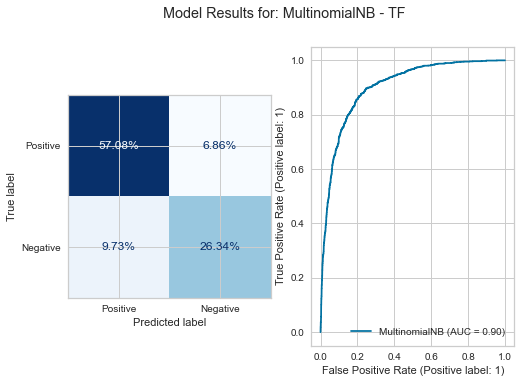

In [45]:
#Split the data into DV and IV's
X = df_word_frequency
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a Multinomial Naive Bayes Classifier
run_model(MultinomialNB(), X_train, y_train, X_test, y_test,desc = 'MultinomialNB - TF', labels = y_labels)

# Model # 2 Bernoulli NB on bool values

============== Results for BernoulliNB - Bool =================
Accuracy              : 83.96%
ROC_AUC               : 82.97%
KAPPA                 : 65.47%
MacroAVG-Precision    : 82.52%
MacroAVG-Recall       : 82.97%
macroAVG-F1 Score     : 82.73%
Avg CrossValid Score  : 82.58% (3 Folds)


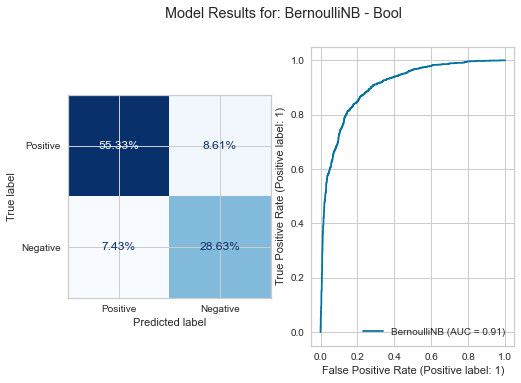

In [46]:
#Split the data into DV and IV's
X = df_word_bool
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Run a Bernoulli Classifier
run_model(BernoulliNB(), X_train, y_train, X_test, y_test,desc='BernoulliNB - Bool',labels = y_labels)

# Model 3 - Multinomial NB on TFIDF

============== Results for Mul-NB - TFIDF =================
Accuracy              : 81.26%
ROC_AUC               : 76.06%
KAPPA                 : 56.19%
MacroAVG-Precision    : 82.86%
MacroAVG-Recall       : 76.06%
macroAVG-F1 Score     : 77.72%
Avg CrossValid Score  : 80.03% (3 Folds)


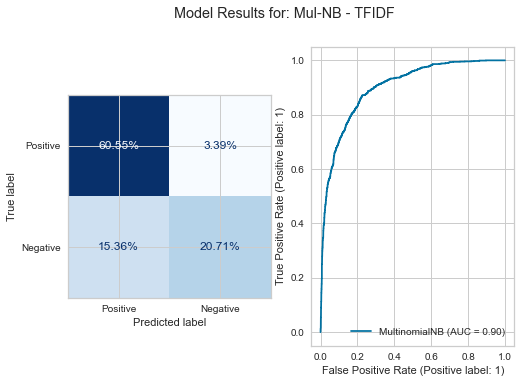

In [47]:
#Split the data into DV and IV's
X = df_tfidf
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a GaussianNB Classifier
model_nb5 = MultinomialNB()
run_model(MultinomialNB(), X_train, y_train, X_test, y_test, desc = 'Mul-NB - TFIDF' , labels = y_labels)

# Model 6 - Suport Vector Machine

============== Results for SVM - TFIDF =================
Accuracy              : 83.55%
ROC_AUC               : 81.42%
KAPPA                 : 63.80%
MacroAVG-Precision    : 82.47%
MacroAVG-Recall       : 81.42%
macroAVG-F1 Score     : 81.89%
Avg CrossValid Score  : 81.86% (3 Folds)


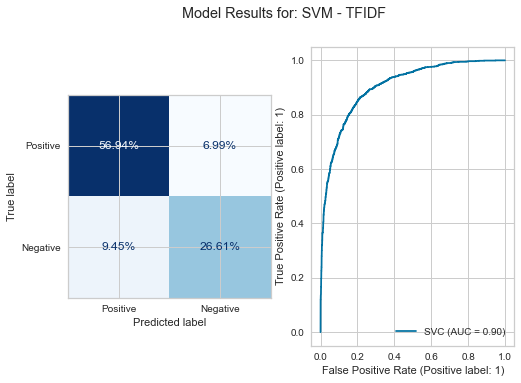

In [48]:
#Split the data into DV and IV's
X = df_tfidf
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a SVC Classifier
#model_svm1 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
run_model(SVC(C=1.0, kernel='linear'), X_train, y_train, X_test, y_test, desc = 'SVM - TFIDF' , labels = y_labels)

============== Results for Random Forest - TFIDF =================
Accuracy              : 82.32%
ROC_AUC               : 78.96%
KAPPA                 : 60.17%
MacroAVG-Precision    : 81.88%
MacroAVG-Recall       : 78.96%
macroAVG-F1 Score     : 80.00%
Avg CrossValid Score  : 80.36% (3 Folds)


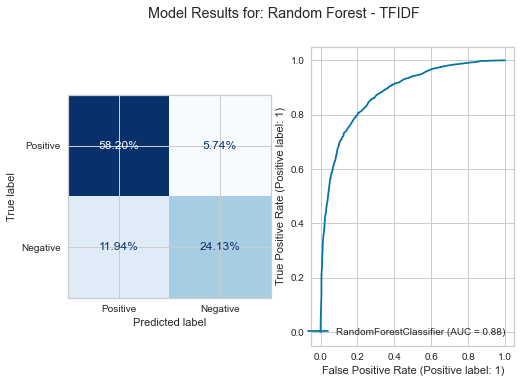

In [49]:

run_model(RandomForestClassifier(random_state = random_state), X_train, y_train, X_test, y_test, desc = 'Random Forest - TFIDF' , labels = y_labels)

============== Results for KNN - TFIDF =================
Accuracy              : 77.46%
ROC_AUC               : 76.03%
KAPPA                 : 51.58%
MacroAVG-Precision    : 75.58%
MacroAVG-Recall       : 76.03%
macroAVG-F1 Score     : 75.78%
Avg CrossValid Score  : 77.70% (3 Folds)


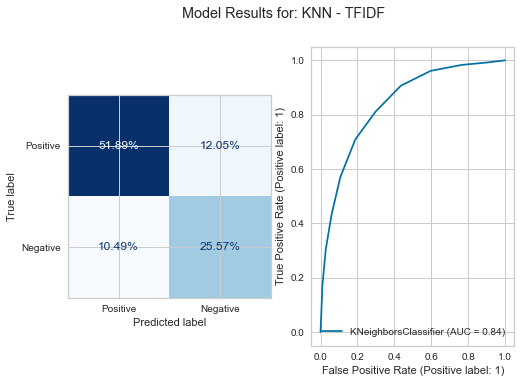

In [50]:
#Create first KNN model
run_model(KNeighborsClassifier(n_neighbors=10), X_train, y_train, X_test, y_test, desc = 'KNN - TFIDF' , labels = y_labels)

# Model 7 - Suport Vector Machine


============== Results for SVM - Bool =================
Accuracy              : 81.83%
ROC_AUC               : 80.62%
KAPPA                 : 60.85%
MacroAVG-Precision    : 80.25%
MacroAVG-Recall       : 80.62%
macroAVG-F1 Score     : 80.42%
Avg CrossValid Score  : 80.91% (3 Folds)
============== Results for Random Forest - Bool =================
Accuracy              : 81.97%
ROC_AUC               : 79.43%
KAPPA                 : 60.08%
MacroAVG-Precision    : 80.84%
MacroAVG-Recall       : 79.43%
macroAVG-F1 Score     : 80.01%
Avg CrossValid Score  : 80.73% (3 Folds)


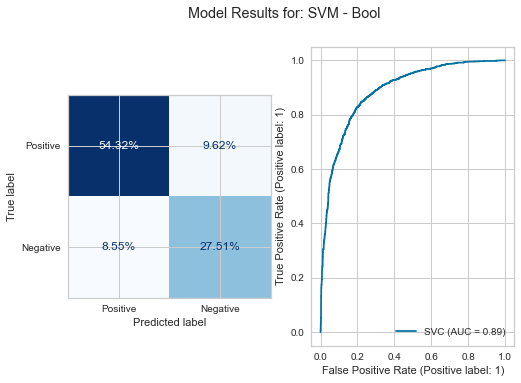

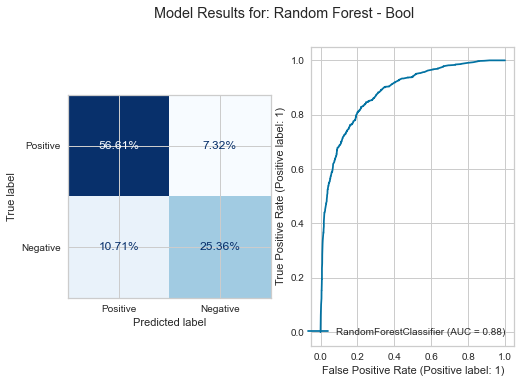

In [51]:
#Split the data into DV and IV's
X = df_word_bool
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a SVC Classifier
#model_svm1 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
run_model(SVC(C=1.0, kernel='linear'), X_train, y_train, X_test, y_test, desc = 'SVM - Bool' , labels = y_labels)
run_model(RandomForestClassifier(random_state = random_state), X_train, y_train, X_test, y_test, desc = 'Random Forest - Bool' , labels = y_labels)

============== Results for Random Forest - Bool =================
Accuracy              : 81.97%
ROC_AUC               : 79.43%
KAPPA                 : 60.08%
MacroAVG-Precision    : 80.84%
MacroAVG-Recall       : 79.43%
macroAVG-F1 Score     : 80.01%
Avg CrossValid Score  : 80.73% (3 Folds)


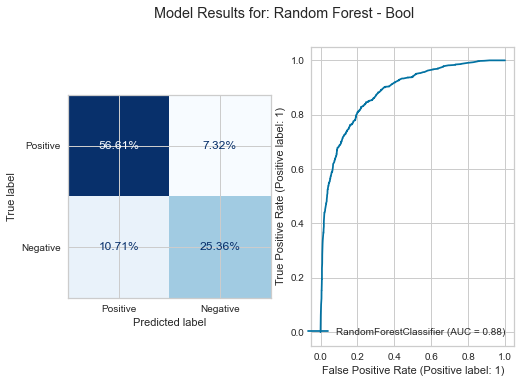

In [52]:
run_model(RandomForestClassifier(random_state = random_state), X_train, y_train, X_test, y_test, desc = 'Random Forest - Bool' , labels = y_labels)

============== Results for KNN - Bool =================
Accuracy              : 58.83%
ROC_AUC               : 65.32%
KAPPA                 : 25.55%
MacroAVG-Precision    : 66.53%
MacroAVG-Recall       : 65.32%
macroAVG-F1 Score     : 58.72%
Avg CrossValid Score  : 57.07% (3 Folds)


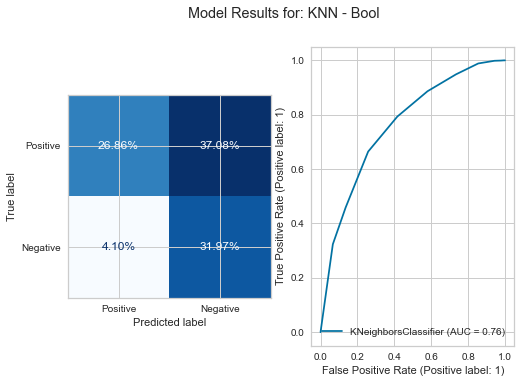

In [53]:
#Create first KNN model
run_model(KNeighborsClassifier(n_neighbors=10), X_train, y_train, X_test, y_test, desc = 'KNN - Bool' , labels = y_labels)

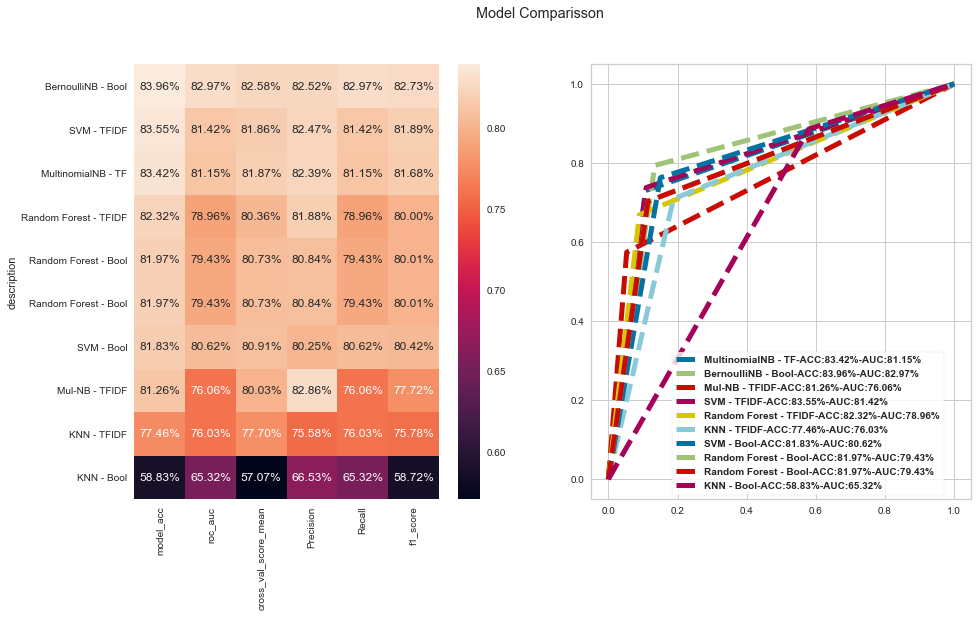

In [54]:
printModelResults(model_results)

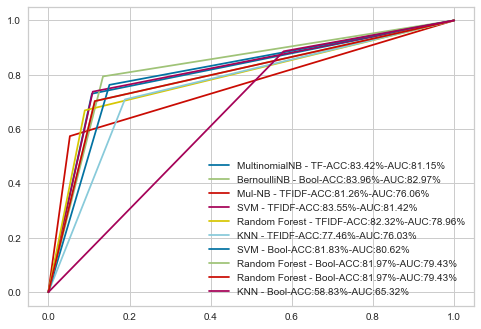

In [55]:
plt.figure(0).clf()
for i in model_results:
    model = model_results[i]
    label = "{}-ACC:{:.2%}-AUC:{:.2%}".format(model['description'],model['model_acc'],model['roc_auc'])
    plt.plot(model['fpr'],model['tpr'],label=label)
    plt.legend(loc=0)

In [56]:
results = pd.DataFrame.from_dict(model_results)
results = results.T
results.head(10)

,model,description,model_acc,roc_auc,cross_val_score_mean,Precision,Recall,f1_score,fpr,tpr
0,<class 'sklearn.naive_bayes.MultinomialNB'>,MultinomialNB - TF,0.834,0.812,0.819,0.824,0.812,0.817,"[0.0, 0.10726495726495726, 1.0]","[0.0, 0.7303030303030303, 1.0]"
1,<class 'sklearn.naive_bayes.BernoulliNB'>,BernoulliNB - Bool,0.84,0.83,0.826,0.825,0.83,0.827,"[0.0, 0.1346153846153846, 1.0]","[0.0, 0.793939393939394, 1.0]"
2,<class 'sklearn.naive_bayes.MultinomialNB'>,Mul-NB - TFIDF,0.813,0.761,0.8,0.829,0.761,0.777,"[0.0, 0.05299145299145299, 1.0]","[0.0, 0.5742424242424242, 1.0]"
3,<class 'sklearn.svm._classes.SVC'>,SVM - TFIDF,0.836,0.814,0.819,0.825,0.814,0.819,"[0.0, 0.1094017094017094, 1.0]","[0.0, 0.7378787878787879, 1.0]"
4,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,Random Forest - TFIDF,0.823,0.79,0.804,0.819,0.79,0.8,"[0.0, 0.08974358974358974, 1.0]","[0.0, 0.668939393939394, 1.0]"
5,<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,KNN - TFIDF,0.775,0.76,0.777,0.756,0.76,0.758,"[0.0, 0.18846153846153846, 1.0]","[0.0, 0.7090909090909091, 1.0]"
6,<class 'sklearn.svm._classes.SVC'>,SVM - Bool,0.818,0.806,0.809,0.802,0.806,0.804,"[0.0, 0.15042735042735042, 1.0]","[0.0, 0.7628787878787879, 1.0]"
7,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,Random Forest - Bool,0.82,0.794,0.807,0.808,0.794,0.8,"[0.0, 0.11452991452991453, 1.0]","[0.0, 0.703030303030303, 1.0]"
8,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,Random Forest - Bool,0.82,0.794,0.807,0.808,0.794,0.8,"[0.0, 0.11452991452991453, 1.0]","[0.0, 0.703030303030303, 1.0]"
9,<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,KNN - Bool,0.588,0.653,0.571,0.665,0.653,0.587,"[0.0, 0.57991452991453, 1.0]","[0.0, 0.8863636363636364, 1.0]"


In [57]:
heat = results[['description','model_acc','roc_auc','cross_val_score_mean','Precision','Recall','f1_score']]
heat = heat.set_index('description')
for col in heat.columns:
    heat[col] = heat[col].astype(float)
heat = heat.sort_values(by='model_acc', ascending=False)

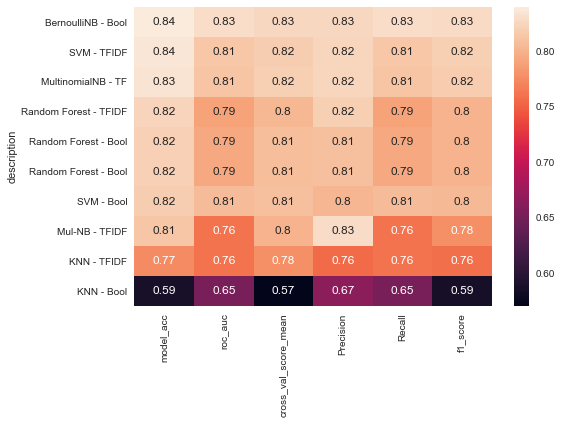

In [58]:
ax = sns.heatmap(heat,annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'MultinomialNB - TF'),
  Text(1, 0, 'BernoulliNB - Bool'),
  Text(2, 0, 'Mul-NB - TFIDF'),
  Text(3, 0, 'SVM - TFIDF'),
  Text(4, 0, 'Random Forest - TFIDF'),
  Text(5, 0, 'KNN - TFIDF'),
  Text(6, 0, 'SVM - Bool'),
  Text(7, 0, 'Random Forest - Bool'),
  Text(8, 0, 'KNN - Bool')])

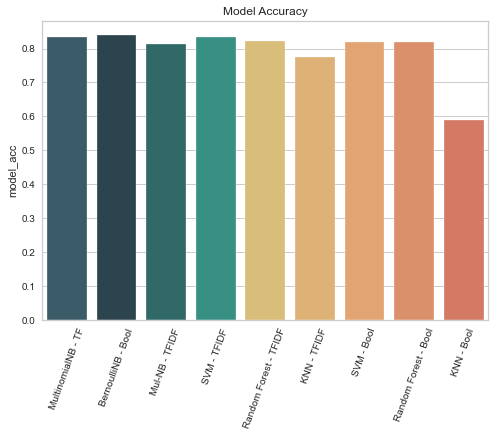

In [59]:
ax = sns.barplot(y='model_acc',x = 'description', data=results,palette=mul_palette)
ax.set(xlabel="",title='Model Accuracy')
ax.axes.yaxis.set_visible(True)
plt.xticks(rotation=70)

In [243]:
#Split the data into DV and IV's from a sample data
X_sample = df_tfidf.sample(frac=0.10, random_state = random_state)
y_sample = df_csv.loc[X_sample.index]['sentiment_positive']
print(X_sample.shape)
print(y_sample.shape)
X_train,X_test, y_train,y_test = train_test_split(X_sample,y_sample,random_state=random_state)


(1464, 3321)
(1464,)


In [244]:
#Define initial model parameters
cv_n_split = 3
random_state = 42
test_train_split = 0.25
cv_iter = 5

classifier = [ SVC(random_state = random_state),RandomForestClassifier(random_state = random_state), KNeighborsClassifier() ]


svc_param = {'C': [0.1,1.0, 10, 100], 
            'kernel': ['lienar', 'poly','rbf'],
            'gamma': [1,0.1,0.01,0.001]
            }

rf_param = {"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]
              }
knn_param = {'n_neighbors': np.arange(1,30),
              "leaf_size":[10,20,30],
              "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']
                }

classifier_params = [ svc_param, rf_param , knn_param]

In [1]:
cv_result=[]
best_paramms=[]
# Splitting train data for model tuning with cross-validation
cv_train_shuffle    =   ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split, random_state=random_state)
cv_train_stratified =   StratifiedKFold(n_splits=cv_n_split, shuffle=True, random_state=random_state)

for i in range(len(classifier)):
    #clf=GridSearchCV(classifier[i], param_grid=classifier_params[i], cv=cv_train_shuffle, scoring="accuracy", n_jobs=-1, verbose=1, refit=False)
    logMessage('Begin Grid Search for {} '.format(classifier[i]),3)
    clf=RandomizedSearchCV(classifier[i], param_distributions=classifier_params[i], cv=cv_train_stratified, scoring="accuracy", n_jobs=-1, verbose=1, refit=False, n_iter= 20)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_paramms.append(clf.best_params_)
    #best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

NameError: name 'ShuffleSplit' is not defined

============== Results for SVM - best params =================
Accuracy              : 81.50%
ROC_AUC               : 79.89%
KAPPA                 : 59.84%
MacroAVG-Precision    : 79.96%
MacroAVG-Recall       : 79.89%
macroAVG-F1 Score     : 79.92%
Avg CrossValid Score  : 79.95% (3 Folds)
============== Results for SVM - best params =================
Accuracy              : 82.30%
ROC_AUC               : 78.06%
KAPPA                 : 59.38%
MacroAVG-Precision    : 82.83%
MacroAVG-Recall       : 78.06%
macroAVG-F1 Score     : 79.50%
Avg CrossValid Score  : 81.36% (3 Folds)
============== Results for KNN - best params =================
Accuracy              : 79.10%
ROC_AUC               : 78.09%
KAPPA                 : 55.35%
MacroAVG-Precision    : 77.34%
MacroAVG-Recall       : 78.09%
macroAVG-F1 Score     : 77.66%
Avg CrossValid Score  : 78.91% (3 Folds)


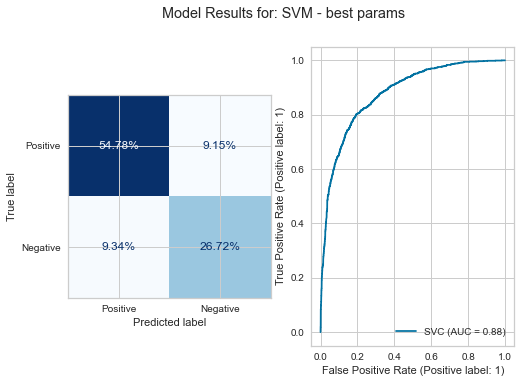

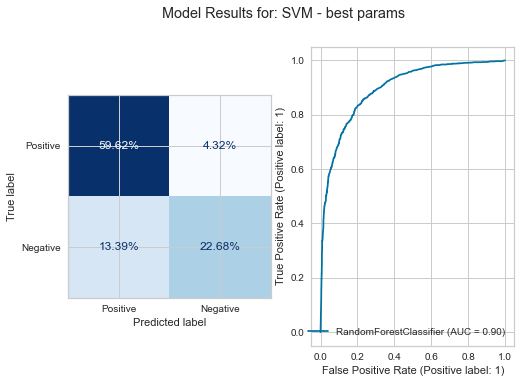

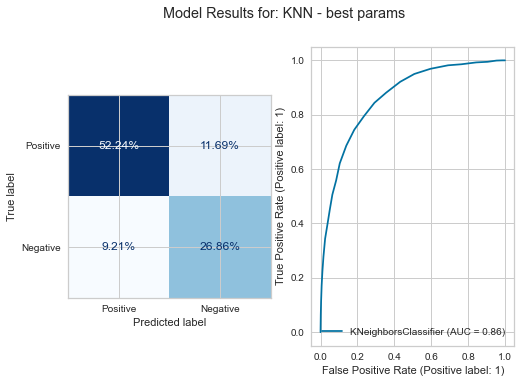

In [248]:
#Split the data into DV and IV's
X = df_tfidf
y = df_csv['sentiment_positive']
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X , y , random_state = random_state, shuffle = True, test_size = test_train_split)
#Create a SVC Classifier
#model_svm1 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

run_model(SVC(**best_paramms[0]), X_train, y_train, X_test, y_test, desc = 'SVM - best params' , labels = y_labels)
run_model(RandomForestClassifier(**best_paramms[1]), X_train, y_train, X_test, y_test, desc = 'SVM - best params' , labels = y_labels)
run_model(KNeighborsClassifier(**best_paramms[2]), X_train, y_train, X_test, y_test, desc = 'KNN - best params' , labels = y_labels)